## Convert postcodes for centres into lat and long
- this should allow plotting onto a map

In [1]:
## use the 'postcodes' module http://postcodes.readthedocs.io/ <<< does not work anymore!
## use the 'geocoder' module from https://geocoder.readthedocs.io/

import geocoder
import time # use to add pauses due to goole limits of request/sec
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
## usage example to get the lat/lng
time.sleep(0.1) # 10/sec
g = geocoder.google('GU3 3EE') #note that google limits to 50/sec, so add a small pauce between each?
print(g)
print(g.latlng)
print(g.latlng[0]) # get only the lat, use [1] for lng

<[OK] Google - Geocode [Baird Dr, Wood Street Village, Guildford GU3 3EE, UK]>
[51.2486717, -0.6298129]
51.2486717


In [3]:
## turn the above into a function to return the lat and lng values in a tuple

def postcode_to_lat_lng(postcode):
    ## input postcode and return (lat,lng) values
    g = geocoder.google(postcode)
    lat,lng = g.latlng
    return lat,lng

In [4]:
postcode_to_lat_lng('GU3 3EE')

(51.2486717, -0.6298129)

### import list of centre_IDs and postcodes from excel

In [8]:
file = 'Data to Import\postcodes\postcodes.xlsx'
postcodes = pd.read_excel(file)
postcodes.head(3)

,Centre ID,PostCode
0,1,CB2 0QQ
1,2,CH63 4JY
2,3,HU3 2JZ


### Get the lat and long in a list for the postcodes imported

In [10]:
## loop through each row and get lat and long in 2 lists
lats = []
lngs = []
for postcode in postcodes['PostCode']:
    lat = postcode_to_lat_lng(postcode)[0]
    lng = postcode_to_lat_lng(postcode)[1]
    lats.append(lat)
    lngs.append(lng)
    time.sleep(0.05)
    #print(postcode)
print(lats)

[52.1750602, 53.33226699999999, 53.7444119, 52.5839404, 51.5538356, 51.2410252, 50.8495891, 51.49790789999999, 50.7219874, 55.8836424, 55.00277610000001, 53.79086359999999, 51.5532242, 50.71671190000001, 53.8014452, 50.9330194, 50.8194684, 53.4297494, 51.487054, 51.614923, 51.504642, 51.27366199999999, 51.49087050000001, 52.4533091, 52.1912021, 51.4514024, 51.3436197, 51.2665887, 50.8665366, 50.9306069, 51.63888919999999, 52.6009805, 53.0500936, 51.235926, 52.05623259999999, 51.7235537, 51.5248655, 51.5230219, 50.4823253, 57.4738232, 50.2665575, 51.0119699, 55.92192859999999, 51.5199992, 52.910345, 53.5532482, 53.4875447, 51.41384979999999, 51.2186071, 52.9434389, 52.4214237, 54.55175509999999]


In [11]:
## add the lat and lng to the df
postcodes['lat']=lats
postcodes['lng']=lngs
postcodes.head()

,Centre ID,PostCode,lat,lng
0,1,CB2 0QQ,52.175060,0.141723
1,2,CH63 4JY,53.332267,-3.025849
2,3,HU3 2JZ,53.744412,-0.358271
3,4,PE3 9GZ,52.583940,-0.279473
4,5,SS0 0RY,51.553836,0.689093


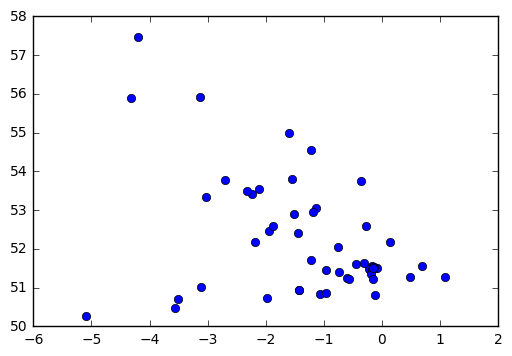

In [12]:
## qucik check of rough shape to see if it is UK shaped...
plt.plot(postcodes['lng'],postcodes['lat'], ls='',marker='o')
plt.show()

In [13]:
## find max and min of lng/lat for plots
lat_max = max(postcodes['lat'])
lat_min = min(postcodes['lat'])
lng_max = max(postcodes['lng'])
lng_min = min(postcodes['lng'])
print(lat_min,lat_max,lng_min,lng_max)

50.2665575 57.4738232 -5.0942626 1.0870833


In [ ]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
offset = 1 #lat/lng offset for map
#print(list(postcodes['lng']))

my_map = Basemap(projection='ortho', lat_0 = 55, lon_0 = -3,
                 resolution = 'i',
                 llcrnrx=-700000,llcrnry=-700000,urcrnrx=500000,urcrnry=500000)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'lightgreen')
my_map.drawmapboundary()
 
pltlons = list(postcodes['lng'])
pltlats = list(postcodes['lat'])
x,y = my_map(pltlons, pltlats)
my_map.plot(x, y, marker='o',color='blue', markersize=5)
#plt.savefig('op-map.png', bbox_inches='tight', dpi=300)
plt.show()

## Try with cartopy instead of basemap